In [120]:
import os

import import_ipynb
import starting_out

# data frame manipulation
import numpy as np
import pandas as pd
from collections import defaultdict

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# statistics
import scipy as sp
from scipy import stats
from statsmodels.base.elastic_net import RegularizedResults
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

from statsmodels.gam.generalized_additive_model import GLMGam

os.chdir('C:/Users/jsbae/410project/data')

In [72]:
df = pd.DataFrame(pd.read_csv('Life Expectancy Data.csv'))

In [24]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [125]:
df = starting_out.scale_data(starting_out.clean_data(df))

y = df.Life_Expectancy
X = df.drop(columns=['Life_Expectancy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

print(X_test)

(2350, 20)
(588,)
(2350,)
          Year  Status  Adult_Mortality  Infant_Deaths   Alcohol  \
1717  1.404986       1         0.485828      -0.248536 -1.156989   
391   0.104330       0        -0.078392      -0.248536  1.640568   
2768  0.321106       0        -0.699034      -0.223092  1.592115   
540  -0.979550       1        -0.981144       0.116160 -1.052431   
736  -1.629878       1         1.461123       1.659757 -0.654602   
...        ...     ...              ...            ...       ...   
138  -0.545998       0        -0.642612      -0.257017  2.002695   
1435 -0.329222       1        -1.134289      -0.163723 -0.218519   
755   1.188210       1         0.735697      -0.248536 -1.024379   
2901 -0.762774       1         0.663155       0.099198 -1.144238   
2029  0.321106       1         0.437467       0.243380 -0.032356   

      Percentage_Exp  HepatitisB   Measles       BMI  Under_Five_Deaths  \
1717       -0.230053    0.694900 -0.211036  0.658180          -0.255805   
391    

In [63]:
ols_model = OLS(y_train, X_train)
ridge_model = ols_model.fit_regularized(method='elastic_net', L1_wt=0.0)
lasso_model = ols_model.fit_regularized(method='elastic_net', L1_wt=1.0)

ols_results = ols_model.fit()
ridge_results = RegularizedResults(ridge_model, X_test)
lasso_results = RegularizedResults(lasso_model, X_test)

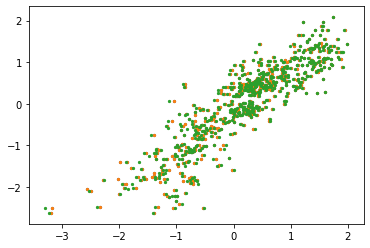

In [89]:
predictions1 = ols_results.predict(X_test)
plt.scatter(predictions1, y_test, s=5)

predictions2 = ridge_model.predict(X_test)
plt.scatter(predictions2, y_test, s=5)

predictions3 = lasso_model.predict(X_test)
plt.scatter(predictions3, y_test, s=5)


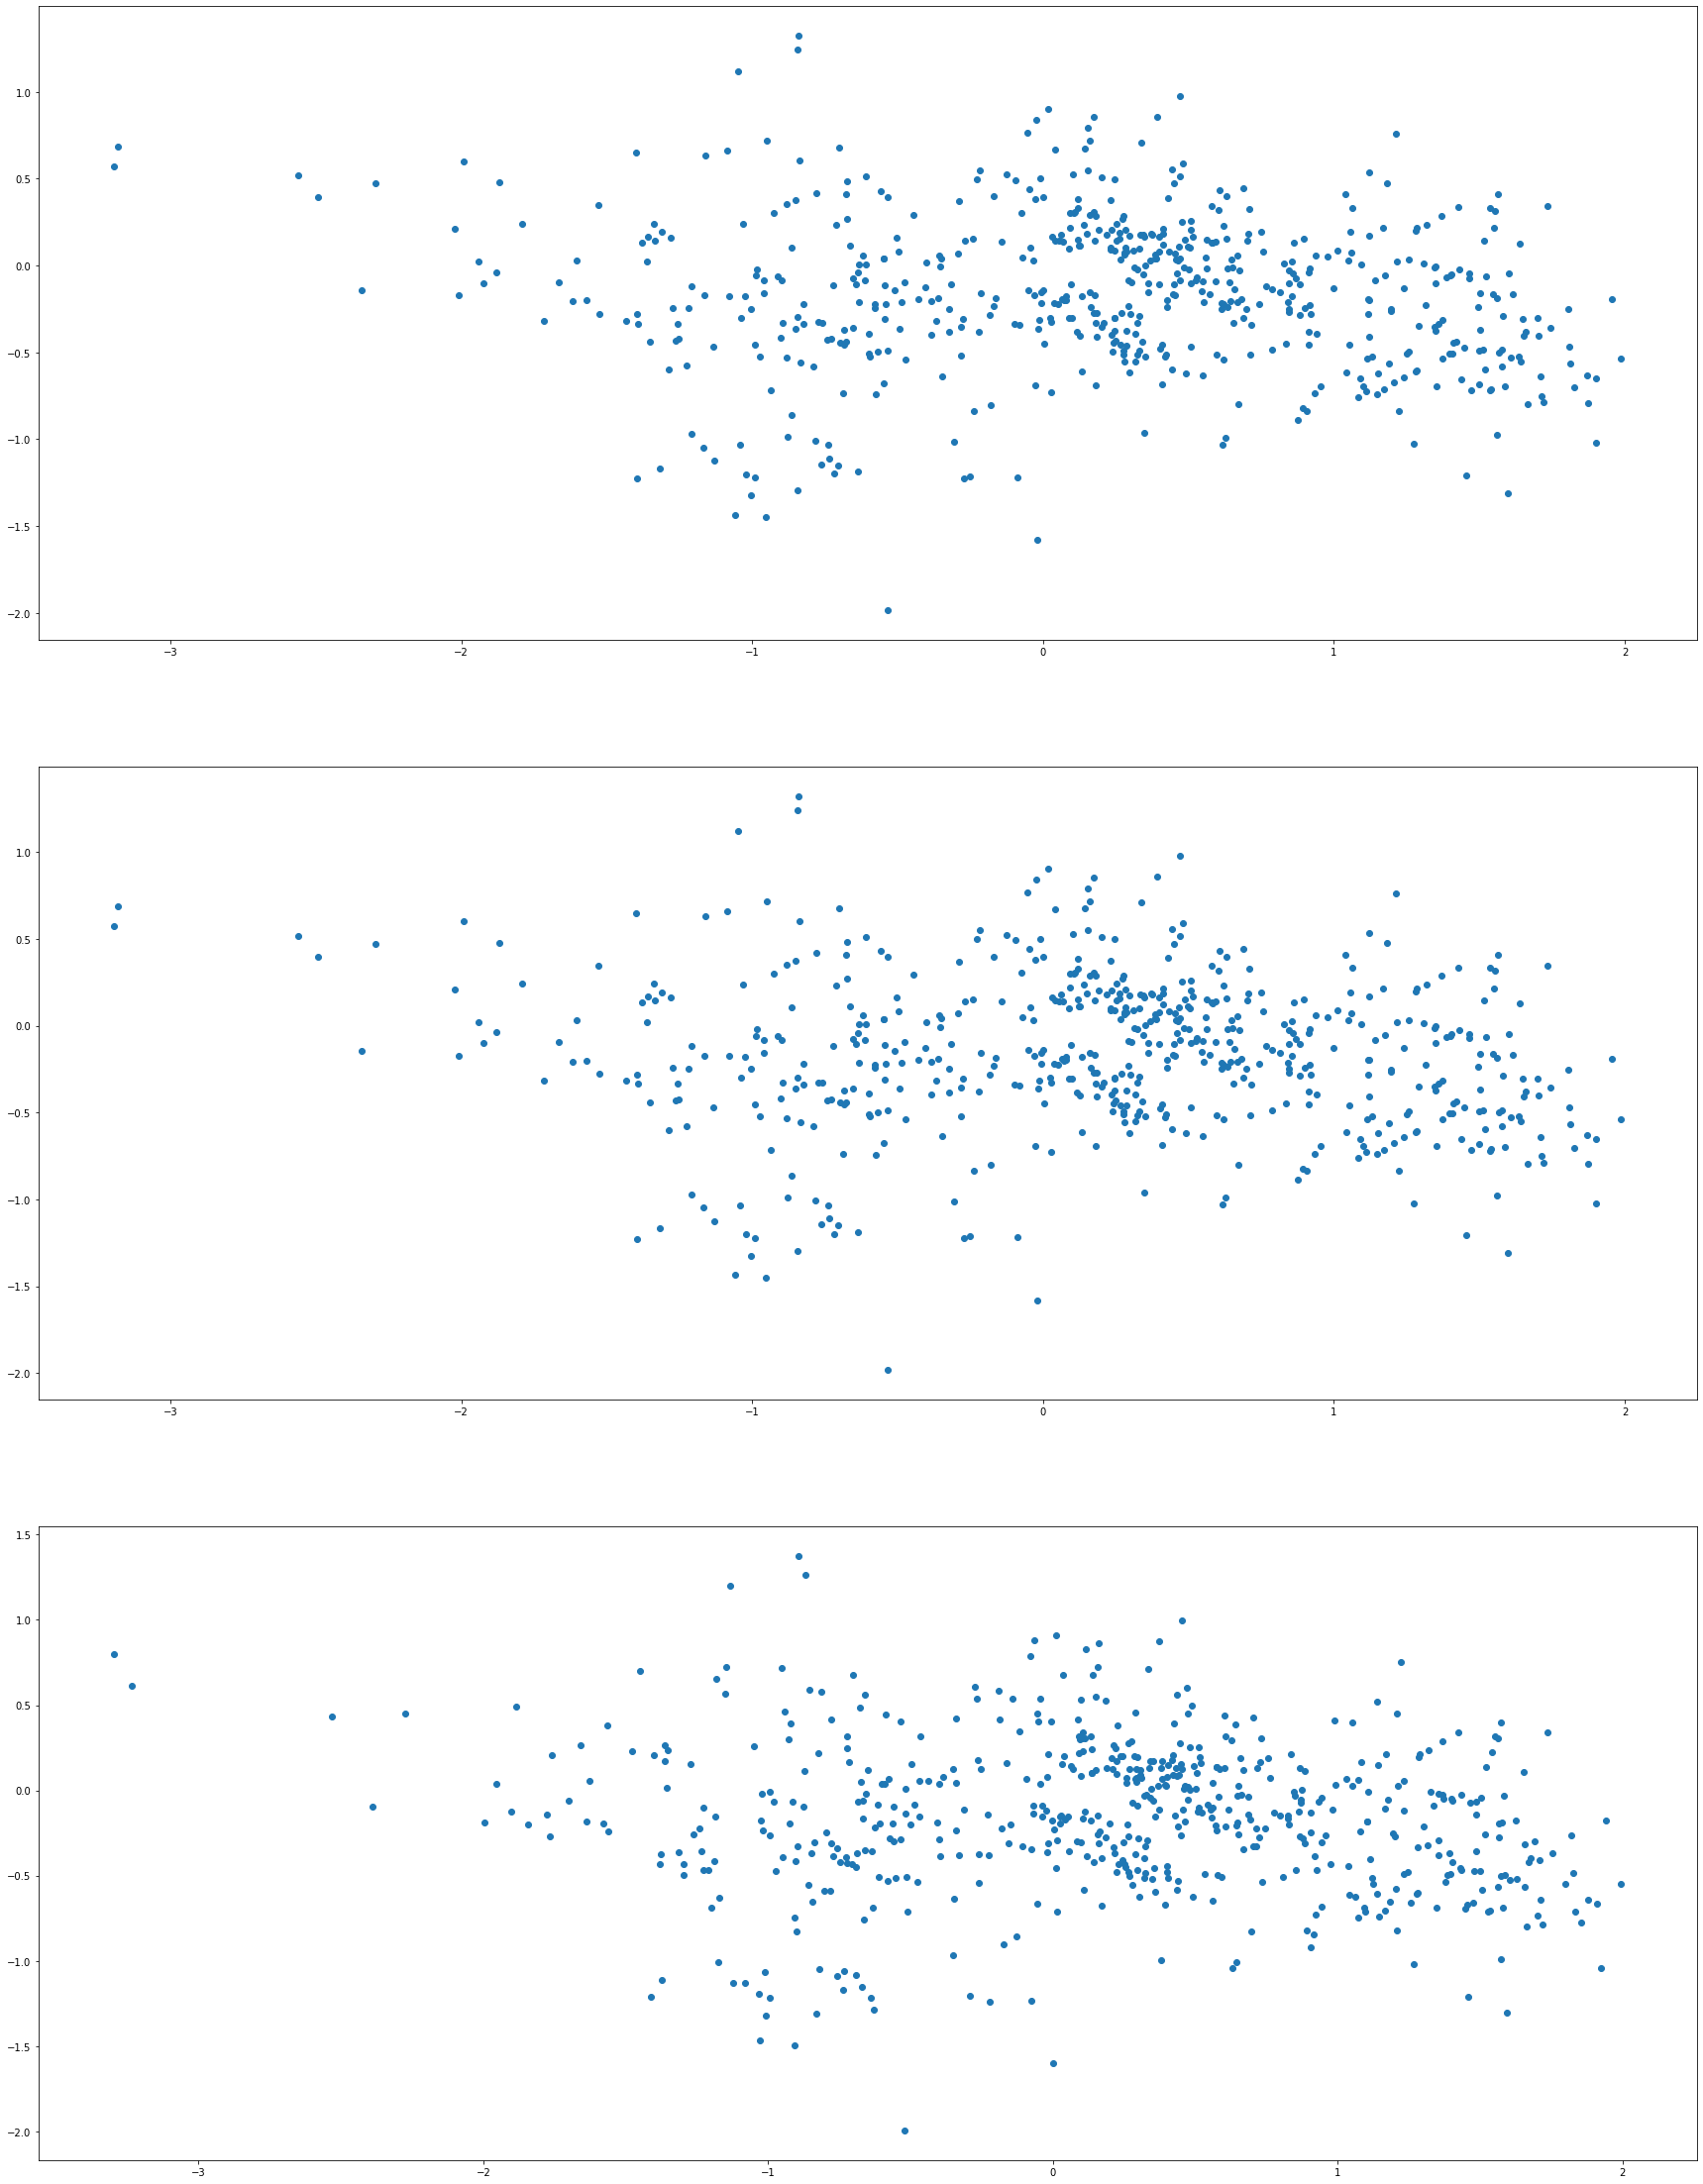

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 40))

residuals1 = y_test - predictions1
residuals2= y_test - predictions2
residuals3 = y_test - predictions3
ax1.scatter(predictions1, residuals1)
ax2.scatter(predictions2, residuals2)
ax3.scatter(predictions3, residuals3)

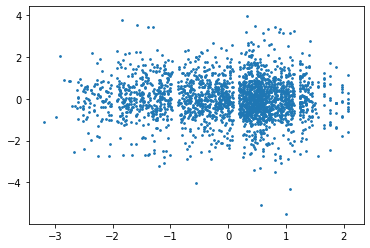

In [115]:
# create instance of influence
influence = ols_results.get_influence()

# leverage (hat values)
leverage = influence.hat_matrix_diag

# Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

# standardized residuals
standardized_residuals = influence.resid_studentized_internal

# both 2350 rows
plt.scatter(y_train, standardized_residuals, s=3)

In [130]:

# print('Parameters: ', ols_results.params)

# print('R2 Adjusted: ', ols_results.rsquared_adj)
# print('Confidence Intervals : ', ols_results.conf_int)

print('Summary: ', ols_results.summary())
# print('\n')
# print('Summary: ', ridge_results.summary())
# print('\n')
# print('Summary: ', lasso_results.summary())

# print('P-values: ', ols_results.pvalues)

# first is F-statistic and that the second is the p-value
# print(sm.stats.linear_rainbow(ols_results))
# result: (0.9050424030857734, 0.9556568644839054)

# to look at all possible methods of results
# dir(ols_results)

Summary:                              OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     527.5
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:27:01   Log-Likelihood:                -1321.8
No. Observations:                2350   AIC:                             2686.
Df Residuals:                    2329   BIC:                             2807.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [19]:
print('Summary: ', elastic_results.summary())
print('Parameters: ', elastic_results.params)
print('R2 Adjusted: ', elastic_results.rsquared_adj)
print('Confidence Intervals : ', elastic_results.conf_int)
print('P-values: ', elastic_results.pvalues)

'''
print('\n')
print(sqt_lasso_results.summary())
print('\n')
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
'''

NotImplementedError: 